<a href="https://colab.research.google.com/github/pvtlul1/AI-ASSIGNMENT/blob/main/AI_%26_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/buildings-vs-forests/traning_set'  # Update with your actual path
test_dir = '/content/drive/MyDrive/buildings-vs-forests/test_set'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/buildings-vs-forests/traning_set/buildings')))
print(len(os.listdir('/content/drive/MyDrive/buildings-vs-forests/traning_set/forest')))
print(len(os.listdir('/content/drive/MyDrive/buildings-vs-forests/test_set/buildings')))
print(len(os.listdir('/content/drive/MyDrive/buildings-vs-forests/test_set/forest')))

2190
2253
437
474


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 3555 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 1498s 13s/step - accuracy: 0.7419 - loss: 0.6069 - val_accuracy: 0.9302 - val_loss: 0.2015
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 159ms/step - accuracy: 0.9363 - loss: 0.1667 - val_accuracy: 0.9212 - val_loss: 0.1975
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 155ms/step - accuracy: 0.9618 - loss: 0.1089 - val_accuracy: 0.9459 - val_loss: 0.1276
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - accuracy: 0.9753 - loss: 0.0785 - val_accuracy: 0.9685 - val_loss: 0.0994
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.9760 - loss: 0.0583 - val_accuracy: 0.9617 - val_loss: 0.1132
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.9823 - loss: 0.0494 - val_accuracy: 0.9617 - val_loss: 0.1374
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.9879 - loss: 0.0238 - val_accuracy: 0.9662 - val_loss: 0.1175
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.9966 - loss: 0

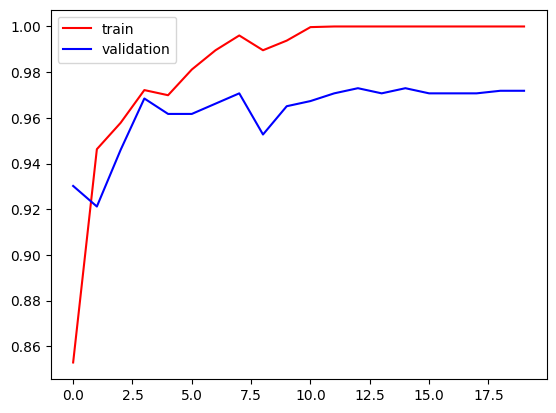

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

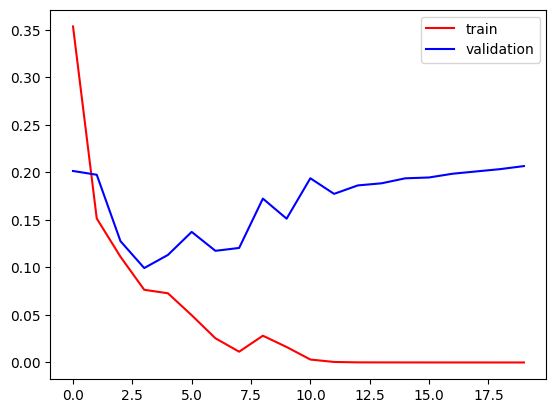

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 911 images belonging to 2 classes.


In [13]:
#predict the test data
predictions = model.predict(test_data)

29/29 ━━━━━━━━━━━━━━━━━━━━ 133s 5s/step


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[206 231]
 [235 239]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       437
           1       0.51      0.50      0.51       474

    accuracy                           0.49       911
   macro avg       0.49      0.49      0.49       911
weighted avg       0.49      0.49      0.49       911



In [15]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 29s 210ms/step - accuracy: 0.8184 - loss: 3.5286 - val_accuracy: 0.6622 - val_loss: 2.9843
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.9155 - loss: 0.9637 - val_accuracy: 0.5856 - val_loss: 4.7702
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.9069 - loss: 1.1013 - val_accuracy: 0.8637 - val_loss: 0.7946
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.9328 - loss: 0.4706 - val_accuracy: 0.8885 - val_loss: 0.7472
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - accuracy: 0.9415 - loss: 0.4170 - val_accuracy: 0.9459 - val_loss: 0.4698
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.9620 - loss: 0.2098 - val_accuracy: 0.7038 - val_loss: 2.9737
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 156ms/step - accuracy: 0.9780 - loss: 0.1253 - val_accuracy: 0.9302 - val_loss: 0.5501
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.9710 - loss: 0

In [18]:
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 911 images belonging to 2 classes.


In [19]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[187 250]
 [219 255]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.46      0.43      0.44       437
           1       0.50      0.54      0.52       474

    accuracy                           0.49       911
   macro avg       0.48      0.48      0.48       911
weighted avg       0.48      0.49      0.48       911



In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - accuracy: 0.6145 - loss: 1.6208 - val_accuracy: 0.8896 - val_loss: 0.2810
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.8831 - loss: 0.2779 - val_accuracy: 0.9302 - val_loss: 0.1972
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.9115 - loss: 0.2242 - val_accuracy: 0.7962 - val_loss: 0.4377
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 186ms/step - accuracy: 0.8975 - loss: 0.2290 - val_accuracy: 0.9437 - val_loss: 0.1519
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.9112 - loss: 0.2245 - val_accuracy: 0.9122 - val_loss: 0.2132
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.9042 - loss: 0.2311 - val_accuracy: 0.9448 - val_loss: 0.1525
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.9339 - loss: 0.1602 - val_accuracy: 0.8592 - val_loss: 0.3419
Epoch 8/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.9405 - loss: 0

In [24]:
predictions = resnet_model.predict(test_data)

29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[215 222]
 [216 258]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       437
           1       0.54      0.54      0.54       474

    accuracy                           0.52       911
   macro avg       0.52      0.52      0.52       911
weighted avg       0.52      0.52      0.52       911

